In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain
import seaborn as sns
import random
import pandas as pd
import csv

file_Suffix = "15"


In [2]:
nodes = dict()

df = pd.read_csv("nodes" + file_Suffix + ".csv")
for row in range(df.shape[0]):
  if not df.iloc[row].Id in nodes:
    nodes[df.iloc[row].Id] = 1

print(len(nodes))

16935


In [3]:
#Familiarity Graph (undirected)
G3 = nx.Graph()

with open("friends" + file_Suffix + ".csv","r") as f:
  reader = csv.reader(f)
  for row in reader:
    #print(row)
    node1, node2 = row
    if(node2 in nodes):
      if(nodes[node2] == 1):
        if(G3.has_edge(node1, node2)):
          G3[node1][node2]['weight'] += 1 #check if node1 node2 is same as node2 node 1
        else:
          G3.add_edge(node1,node2,weight=1)


filtered_edges = [(u, v, d) for u, v, d in G3.edges(data=True) if d['weight'] >=2]

# create a new graph with filtered edges
filtered_G = nx.Graph(filtered_edges)

G_Complete_Familiarity = filtered_G
       
        
    
print("Nodes ", filtered_G.number_of_nodes())
print("Edges ", filtered_G.number_of_edges())
  
# nx.draw(G3, with_labels = True)
# plt.show()

Nodes  1520
Edges  24365


In [4]:
def measure_sim(G_Familarity, G_Similarity, no_groups):
  filtered_edges = [(u, v, d) for u, v, d in G_Similarity.edges(data=True) if d['weight'] >= no_groups]

  # create a new graph with filtered edges
  filtered_G = nx.Graph(filtered_edges)
  print("total nodes after filtering: ",filtered_G.number_of_nodes())
  print("total edges after filtering: ",filtered_G.number_of_edges())

  edges_intersection = set(G_Familarity.edges()).intersection(set(filtered_G.edges()))
  print(len(edges_intersection))
  edges_union = set(G_Familarity.edges()).union(set(filtered_G.edges()))
  print(len(edges_union))

  #similarity = (i/5)*len(edges_intersection)/len(edges_union)
  similarity = len(edges_intersection)/len(edges_union)

  print("similarity:", similarity)
  return similarity

In [5]:
def measure_sim_new(G_Familarity, G_Similarity, no_groups):
  filtered_edges = [(u, v, d) for u, v, d in G_Similarity.edges(data=True) if d['weight'] >= no_groups]

  # create a new graph with filtered edges
  filtered_G = nx.Graph(filtered_edges)
  print("total nodes after filtering: ",filtered_G.number_of_nodes())
  print("total edges after filtering: ",filtered_G.number_of_edges())

  edges_intersection = set(G_Familarity.edges()).intersection(set(filtered_G.edges()))
  print(len(edges_intersection))
  edges_union = set(G_Familarity.edges()).union(set(filtered_G.edges()))
  print(len(edges_union))

  #similarity = (i/5)*len(edges_intersection)/len(edges_union)
  similarity = len(edges_intersection)/len(edges_union)

  print("similarity:", similarity)
  return similarity

In [6]:
def measure_sim_2(G_Familarity, G_Similarity, no_groups):
  filtered_edges = [(u, v, d) for u, v, d in G_Similarity.edges(data=True) if d['weight'] >= no_groups]

  # create a new graph with filtered edges
  filtered_G = nx.Graph(filtered_edges)
  print("total nodes after filtering: ",filtered_G.number_of_nodes())
  print("total edges after filtering: ",filtered_G.number_of_edges())

  

  similarity = nx.optimize_graph_edit_distance(G_Familarity, filtered_G)

  print("similarity:", similarity)
  return similarity

In [7]:
#similarity graph (undirected)

G4 = nx.Graph()

with open("edges" + file_Suffix + ".csv","r") as f:
  reader = csv.reader(f)
  for row in reader:
    node1,node2 =  row
    if(G4.has_edge(node1,node2)):
      G4[node1][node2]['weight'] += 1 
    else:
      G4.add_edge(node1,node2,weight = 1)



print(G4.number_of_nodes())
print(G4.number_of_edges())

# nx.draw(G4,with_labels = True)
# plt.show()

17280
16987876


In [8]:
Gf = nx.intersection(G4,filtered_G)

In [9]:
max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
print(max_weight)

13


In [10]:
# max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
# similarity = []
# print(G3.number_of_nodes())
# print(G3.number_of_edges())
# print(G4.number_of_edges())
# print(G4.number_of_nodes())
# for i in range(0,max_weight+1):
#   #print(i)
#   similarity.append(measure_sim_new(Gf, G4, i))

# plt.plot(similarity)

# # add labels and title
# plt.xlabel('Number of Groups')
# plt.ylabel('Similarity Between the Graphs')
# plt.title('Modelling Similarity')

# # display the plot
# plt.show()

In [11]:
print(max_weight)

13


### New Method 2 - Comparing to last graph with division

In [12]:
# max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
# similarityLIST = []
# print(G3.number_of_nodes())
# print(G3.number_of_edges())
# print(G4.number_of_edges())
# print(G4.number_of_nodes())


# lastCount = len(filtered_edges)

# for i in range(0,max_weight+1):
    
#     # inline function
#     G_Familarity, G_Similarity, no_groups = Gf, G4, i
    
#     filtered_edges = [(u, v, d) for u, v, d in G_Similarity.edges(data=True) if d['weight'] >= no_groups]

#     # create a new graph with filtered edges
#     filtered_G = nx.Graph(filtered_edges)
#     print("total nodes after filtering: ",filtered_G.number_of_nodes())
#     print("total edges after filtering: ",filtered_G.number_of_edges())

#     edges_intersection = set(G_Familarity.edges()).intersection(set(filtered_G.edges()))
#     print(len(edges_intersection))
#     edges_union = set(G_Familarity.edges()).union(set(filtered_G.edges()))
#     print(len(edges_union))

#     #similarity = (i/5)*len(edges_intersection)/len(edges_union)
#     similarity = len(edges_intersection)/lastCount
#     lastCount = len(edges_intersection)

#     print("similarity:", similarity)
#     similarityLIST.append( similarity )

# plt.plot(similarityLIST)

# # add labels and title
# plt.xlabel('Number of Groups')
# plt.ylabel('Similarity Between the Graphs')
# plt.title('Modelling Similarity')

# # display the plot
# plt.show()

# Comparing all Values

In [13]:
G_Complete_Familiarity  # Graph of Familiarity
Gs1 = G4                # Graph of Similiarity   

max_common_occurances = max([d['weight'] for (u, v, d) in G4.edges(data=True)])


dataPoints = {
    "false_negatives":[],
    "false_positives":[],
    "true_positives":[],
}


for no_groups in range(1,max_common_occurances+1):
    
    filtered_edges = [(u, v, d) for u, v, d in Gs1.edges(data=True) if d['weight'] >= no_groups]
    
    filtered_G = nx.Graph(filtered_edges)

    gFamEdgeSET = set(G_Complete_Familiarity.edges())
    gSimEdgeSET = set(filtered_G.edges())

    false_positives = gSimEdgeSET - (gFamEdgeSET.intersection(gSimEdgeSET))
    false_negatives = gFamEdgeSET - (gFamEdgeSET.intersection(gSimEdgeSET))

    true_positives = gFamEdgeSET.intersection(gSimEdgeSET)
    
    dataPoints['false_negatives'].append(len(false_negatives))
    dataPoints['false_positives'].append(len(false_positives))
    dataPoints['true_positives'].append(len(true_positives))


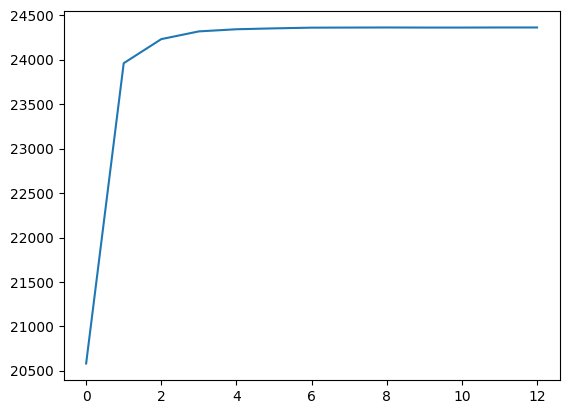

In [14]:
dataPoints['false_negatives']
plt.plot(dataPoints['false_negatives'])

[16984094, 501686, 120173, 47232, 21101, 9609, 4340, 1929, 963, 444, 189, 68, 12]


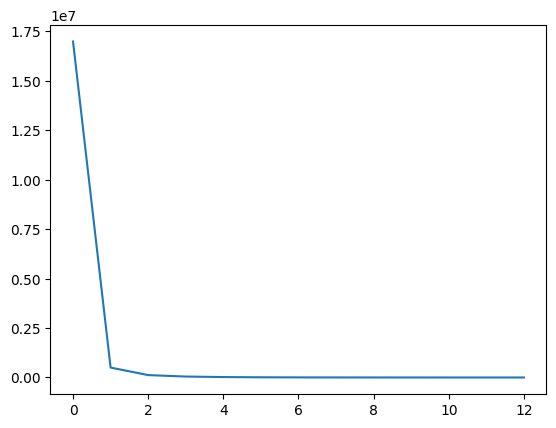

In [15]:
print(dataPoints['false_positives'])
plt.plot(dataPoints['false_positives'])

[3782, 402, 131, 44, 20, 10, 2, 1, 0, 1, 1, 0, 0]


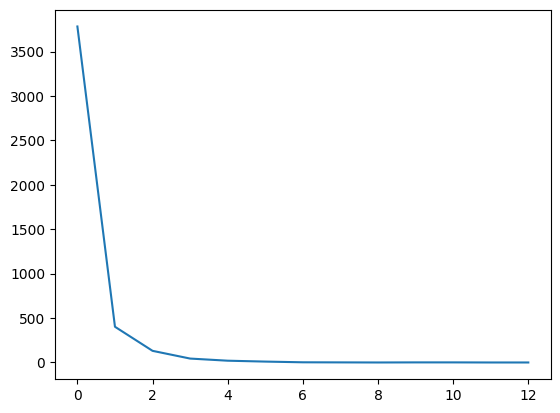

In [16]:
print(dataPoints['true_positives'])
plt.plot(dataPoints['true_positives'])

In [17]:
dataPoints['false_positives']

[16984094,
 501686,
 120173,
 47232,
 21101,
 9609,
 4340,
 1929,
 963,
 444,
 189,
 68,
 12]

In [18]:

filtered_edges = [(u, v, d) for u, v, d in Gs1.edges(data=True) if d['weight'] >= 10]

filtered_G = nx.Graph(filtered_edges)

gFamEdgeSET = set(G_Complete_Familiarity.edges())
gSimEdgeSET = set(filtered_G.edges())

G_intersection = gFamEdgeSET.intersection(gSimEdgeSET)

false_positives = gSimEdgeSET - (G_intersection)
false_negatives = gFamEdgeSET - (G_intersection)

true_positives = gFamEdgeSET.intersection(gSimEdgeSET)

print(len(false_negatives))
print(len(false_positives))
print(len(true_positives))

24364
444
1


In [19]:
print(len(gFamEdgeSET))
print(len(gSimEdgeSET))

24365
445


In [20]:
G_intersection = gFamEdgeSET.intersection(gSimEdgeSET)
G_intersection

{('124277838@N06', '93898462@N03')}

In [21]:
filtered_G = nx.Graph(filtered_edges)



In [22]:

gFamEdgeSET = set(G_Complete_Familiarity.edges())
gSimEdgeSET = set(filtered_G.edges())

# Comparision Subtraction

Gf U (Gs - ())

13175
183196
16987876
17280
total nodes after filtering:  17280
total edges after filtering:  16987876
2030
16989697
similarity: 0.00011948730879970465
total nodes after filtering:  17280
total edges after filtering:  16987876
2030
16989697
similarity: 0.00011949845732200896
total nodes after filtering:  2596
total edges after filtering:  502088
213
505726
similarity: 0.0004228741145452813
total nodes after filtering:  1036
total edges after filtering:  120304
68
124087
similarity: 0.0005489448956197426
total nodes after filtering:  605
total edges after filtering:  47276
26
51101
similarity: 0.0005094742617521996
total nodes after filtering:  387
total edges after filtering:  21121
14
24958
similarity: 0.0005615273544039789
total nodes after filtering:  264
total edges after filtering:  9619
3
13467
similarity: 0.00022299858767561138
total nodes after filtering:  168
total edges after filtering:  4342
0
8193
similarity: 0.0
total nodes after filtering:  97
total edges after filtering:

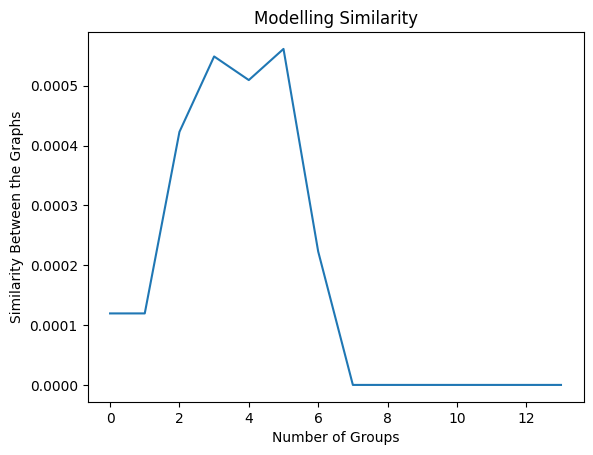

In [23]:
max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
similarityLIST = []
print(G3.number_of_nodes())
print(G3.number_of_edges())
print(G4.number_of_edges())
print(G4.number_of_nodes())


lastCount = len(filtered_edges)

for i in range(0,max_weight+1):
    
    # inline function
    G_Familarity, G_Similarity, no_groups = Gf, G4, i
    
    filtered_edges = [(u, v, d) for u, v, d in G_Similarity.edges(data=True) if d['weight'] >= no_groups]

    # create a new graph with filtered edges
    filtered_G = nx.Graph(filtered_edges)
    print("total nodes after filtering: ",filtered_G.number_of_nodes())
    print("total edges after filtering: ",filtered_G.number_of_edges())

    edges_intersection = set(G_Familarity.edges()).intersection(set(filtered_G.edges()))
    print(len(edges_intersection))
    edges_union = set(G_Familarity.edges()).union(set(filtered_G.edges()))
    print(len(edges_union))

    #similarity = (i/5)*len(edges_intersection)/len(edges_union)
    similarity = (len(edges_intersection))/(len(edges_union) - lastCount)
    lastCount = len(edges_intersection)

    print("similarity:", similarity)
    similarityLIST.append( similarity )

plt.plot(similarityLIST)

# add labels and title
plt.xlabel('Number of Groups')
plt.ylabel('Similarity Between the Graphs')
plt.title('Modelling Similarity')

# display the plot
plt.show()

13175
183196
16987876
17280
total nodes after filtering:  17280
total edges after filtering:  16987876
2030
16989697
similarity: 0.00011948417914692651
total nodes after filtering:  17280
total edges after filtering:  16987876
2030
16989697
similarity: 0.00011948417914692651
total nodes after filtering:  2596
total edges after filtering:  502088
213
505726
similarity: 0.00042117668460787066
total nodes after filtering:  1036
total edges after filtering:  120304
68
124087
similarity: 0.0005480026110712646
total nodes after filtering:  605
total edges after filtering:  47276
26
51101
similarity: 0.0005087963053560596
total nodes after filtering:  387
total edges after filtering:  21121
14
24958
similarity: 0.0005609423832037823
total nodes after filtering:  264
total edges after filtering:  9619
3
13467
similarity: 0.00022276676319893073
total nodes after filtering:  168
total edges after filtering:  4342
0
8193
similarity: 0.0
total nodes after filtering:  97
total edges after filtering

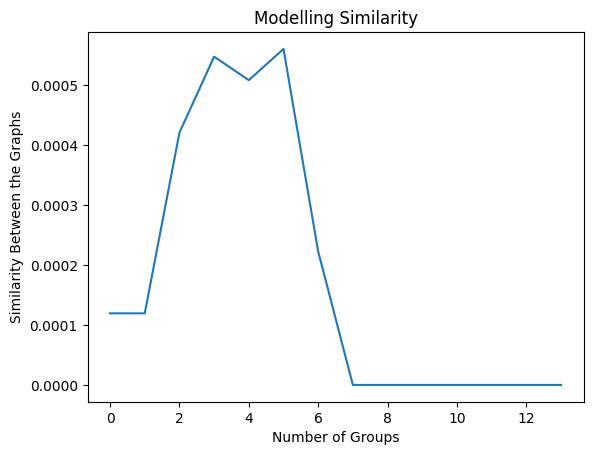

In [24]:
max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
similarity = []
print(G3.number_of_nodes())
print(G3.number_of_edges())
print(G4.number_of_edges())
print(G4.number_of_nodes())
for i in range(0,max_weight+1):
  #print(i)
  similarity.append(measure_sim_new(Gf, G4, i))

plt.plot(similarity)

# add labels and title
plt.xlabel('Number of Groups')
plt.ylabel('Similarity Between the Graphs')
plt.title('Modelling Similarity')

# display the plot
plt.show()

In [25]:
max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
similarity = []
print(G3.number_of_nodes())
print(G3.number_of_edges())
print(G4.number_of_edges())
print(G4.number_of_nodes())
for i in range(0,max_weight+1):
  #print(i)
  similarity.append(measure_sim(filtered_G, G4, i))

plt.plot(similarity)

# add labels and title
plt.xlabel('Number of Groups')
plt.ylabel('Similarity Between the Graphs')
plt.title('Modelling Similarity')

# display the plot
plt.show()

In [ ]:
max_weight = max([d['weight'] for (u, v, d) in G4.edges(data=True)])
similarity = []
print(G3.number_of_nodes())
print(G3.number_of_edges())
print(G4.number_of_edges())
print(G4.number_of_nodes())
for i in range(0,max_weight+1):
  #print(i)
  temp = measure_sim_2(filtered_G, G4, i)
  for v in temp:
    minv = v
  similarity.append(minv)

plt.plot(similarity)

# add labels and title
plt.xlabel('Number of Groups')
plt.ylabel('Similarity Between the Graphs')
plt.title('Modelling Similarity')

# display the plot
plt.show()

1337
4008
827566
2204
total nodes after filtering:  2204
total edges after filtering:  827566
similarity: <generator object optimize_graph_edit_distance at 0x7eff10cf1310>


ModuleNotFoundError: No module named 'scipy'

In [ ]:
# import csv
# import requests

# url = 'https://github.com/yjp1406/SNA_Project_Files/blob/main/friends15.csv'

# G5 = nx.Graph()
# response = requests.get(url)
# lines = response.text.splitlines()

# reader = csv.reader(lines)
# for row in reader:
#     node1,node2 =  row
#     if(G5.has_edge(node1,node2)):
#       G5[node1][node2]['weight'] += 1
#     else:
#       G5.add_edge(node1,node2,weight = 1)

# print(G5.number_of_nodes())



ValueError: ignored